In [ ]:
!gdown 1VBvTjYdYhCBLX9NZsStj581dXHkIUDa4

Downloading...
From (original): https://drive.google.com/uc?id=1VBvTjYdYhCBLX9NZsStj581dXHkIUDa4
From (redirected): https://drive.google.com/uc?id=1VBvTjYdYhCBLX9NZsStj581dXHkIUDa4&confirm=t&uuid=4be04500-861a-4b0e-b372-cb7cefdf695f
To: /content/combined.zip
100% 338M/338M [00:05<00:00, 61.3MB/s]


In [ ]:

!git clone https://github.com/sathyasubrahamanaya/tfkan.git


Cloning into 'tfkan'...
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 119 (delta 45), reused 71 (delta 20), pack-reused 0 (from 0)
Receiving objects: 100% (119/119), 244.08 KiB | 1.27 MiB/s, done.
Resolving deltas: 100% (45/45), done.


In [ ]:
!python --version

Python 3.11.11


In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tf_keras


In [ ]:
!cd tfkan && pip install .

Processing /content/tfkan
  Preparing metadata (setup.py) ... done
  Created wheel for tfkan: filename=tfkan-0.1.1-py3-none-any.whl size=12835 sha256=d86932e001fe5a57d4d26a7571c0bf27fcbf066c40f53b22f6b2093789f0e385
  Stored in directory: /tmp/pip-ephem-wheel-cache-z62rqbul/wheels/a5/fc/95/f9059e7bf833c7a6d3046ccd15c8c312b7416c65e3fe8ec417
Successfully built tfkan


In [ ]:
!pwd

/content


In [ ]:
!unzip /content/combined.zip

Streaming output truncated to the last 5000 lines.
  inflating: combined/Training/no_tumor/ntimage(13).jpg  
  inflating: combined/Training/no_tumor/ntimage(130).jpg  
  inflating: combined/Training/no_tumor/ntimage(131).jpg  
  inflating: combined/Training/no_tumor/ntimage(132).jpg  
  inflating: combined/Training/no_tumor/ntimage(133).jpg  
  inflating: combined/Training/no_tumor/ntimage(134).jpg  
  inflating: combined/Training/no_tumor/ntimage(135).jpg  
  inflating: combined/Training/no_tumor/ntimage(136).jpg  
  inflating: combined/Training/no_tumor/ntimage(137).jpg  
  inflating: combined/Training/no_tumor/ntimage(138).jpg  
  inflating: combined/Training/no_tumor/ntimage(139).jpg  
  inflating: combined/Training/no_tumor/ntimage(14).jpg  
  inflating: combined/Training/no_tumor/ntimage(140).jpg  
  inflating: combined/Training/no_tumor/ntimage(141).jpg  
  inflating: combined/Training/no_tumor/ntimage(142).jpg  
  inflating: combined/Training/no_tumor/ntimage(143).jpg  
  infla

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os

In [ ]:
root_path = '/content/combined'
train_path = '/content/combined/Training'
test_path = '/content/combined/Testing'

In [ ]:
def get_data(train_path, test_path):
  X = []
  Y = []
  X_test = []
  Y_test = []
  for class_names in os.listdir(train_path):
     class_path = train_path + '/' + class_names
     for image_name in os.listdir(class_path):
      try:
       image_path = class_path + '/' + image_name

       image = cv2.imread(image_path)
       image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
       image = cv2.resize(image, (64, 64))
       X.append(image)
       Y.append(class_names)
      except:
        pass
  for class_names in os.listdir(test_path):
     class_path = test_path + '/' + class_names
     for image_name in os.listdir(class_path):
      try:
       image_path = class_path + '/' + image_name
       image = cv2.imread(image_path)
       image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
       image = cv2.resize(image, (64, 64))
       X_test.append(image)
       Y_test.append(class_names)
      except:
        pass
  return np.array(X), np.array(Y), np.array(X_test), np.array(Y_test)

X, Y, X_test, Y_test = get_data(train_path, test_path)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)
Y_test = le.transform(Y_test)



In [ ]:
le.inverse_transform([2])

array(['no_tumor'], dtype='<U10')

In [ ]:
X_scaled = X/255
X_test_scaled = X_test/255

In [ ]:
import tensorflow as tf
import tfkan
from tfkan.layers.dense import DenseKAN

In [ ]:
model0 = tf.keras.models.Sequential(
    [
        tf.keras.layers.Input(shape=(64,64,3)),
        tf.keras.layers.Conv2D(16,(2,2),activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32,(2,2),activation='relu'),

        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32,activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(16,activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(4,activation='softmax')

    ]
)

In [ ]:
model0.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model0.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 63, 63, 16)          │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 31, 31, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 30, 30, 32)          │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 15, 15, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 32)                  │         230,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 233,508 (912.14 KB)

 Trainable params: 233,412 (911.77 KB)

 Non-trainable params: 96 (384.00 B)

In [ ]:
X_scaled.shape

(11452, 64, 64, 3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(X_scaled,Y,test_size=0.2)

In [ ]:
history = model0.fit(X_train,Y_train,epochs=10,validation_data=(X_val,Y_val))

Epoch 1/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.4645 - loss: 1.1913 - val_accuracy: 0.4443 - val_loss: 1.2412
Epoch 2/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6813 - loss: 0.7463 - val_accuracy: 0.7944 - val_loss: 0.5683
Epoch 3/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7591 - loss: 0.5749 - val_accuracy: 0.8747 - val_loss: 0.3312
Epoch 4/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8177 - loss: 0.4481 - val_accuracy: 0.8725 - val_loss: 0.3064
Epoch 5/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8312 - loss: 0.4171 - val_accuracy: 0.9262 - val_loss: 0.2080
Epoch 6/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8739 - loss: 0.3203 - val_accuracy: 0.9323 - val_loss: 0.1691
Epoch 7/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9063 - loss: 0.2528 - val_accuracy: 0.9446 - val_loss: 0.1461
Epoch 8/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9171 - loss: 0.2312 - val_accuracy: 

In [ ]:
model0.evaluate(X_test_scaled,Y_test)

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8283 - loss: 1.1285


[1.5938760042190552, 0.8251548409461975]

In [ ]:
model0.save('model_new.keras')

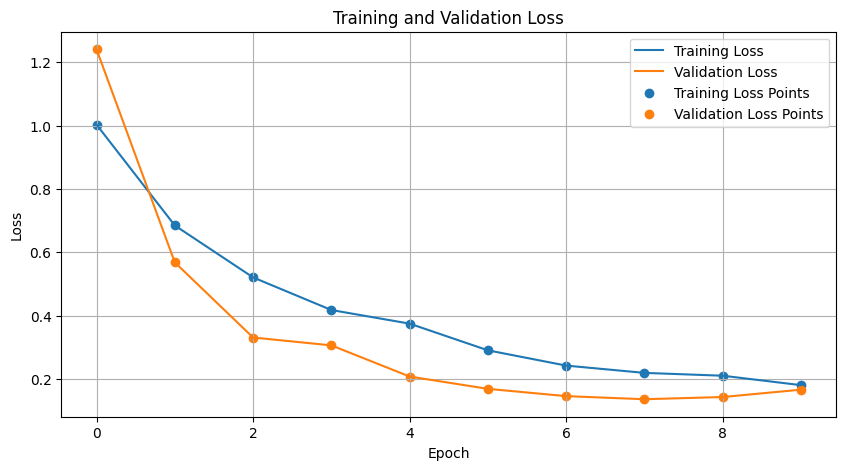

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.scatter(range(len(history.history['loss'])), history.history['loss'], label='Training Loss Points')
plt.scatter(range(len(history.history['val_loss'])), history.history['val_loss'], label='Validation Loss Points')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

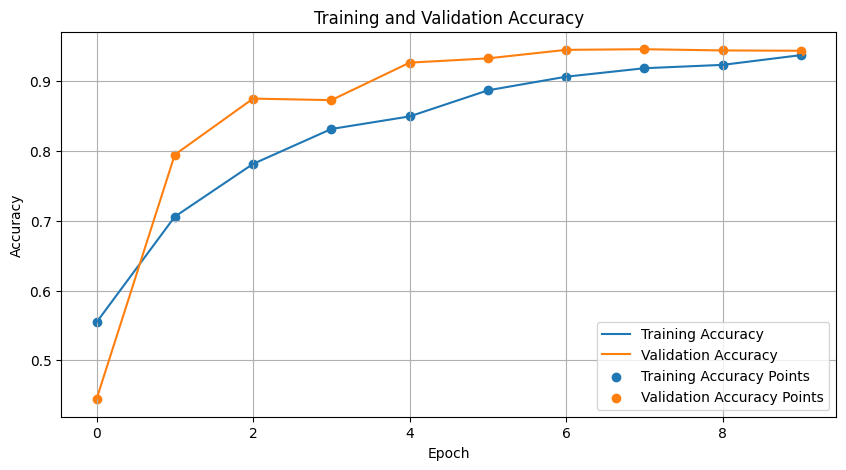

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.scatter(range(len(history.history['accuracy'])), history.history['accuracy'], label='Training Accuracy Points')
plt.scatter(range(len(history.history['val_accuracy'])), history.history['val_accuracy'], label='Validation Accuracy Points')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
####  KAN ######

In [ ]:
model0KAN= tf.keras.models.Sequential(
    [
       tf.keras.layers.Input(shape=(64,64,3)),
        tf.keras.layers.Conv2D(16,(2,2),activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32,(2,2),activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Flatten(),
        DenseKAN(32),
        tf.keras.layers.Dropout(0.3),
        DenseKAN(16),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(4,activation='softmax')
    ])

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tfkan import layers
from tfkan.layers import DenseKAN

Epoch 1/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.5506 - loss: 1.1638 - val_accuracy: 0.2881 - val_loss: 2.0566
Epoch 2/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7377 - loss: 0.6727 - val_accuracy: 0.6999 - val_loss: 0.9321
Epoch 3/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8100 - loss: 0.4734 - val_accuracy: 0.8827 - val_loss: 0.3512
Epoch 4/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8499 - loss: 0.3813 - val_accuracy: 0.9149 - val_loss: 0.2625
Epoch 5/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8811 - loss: 0.3108 - val_accuracy: 0.9285 - val_loss: 0.2400
Epoch 6/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8981 - loss: 0.2731 - val_accuracy: 0.9356 - val_loss: 0.2179
Epoch 7/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9012 - loss: 0.2646 - val_accuracy: 0.9444 - val_loss: 0.1771
Epoch 8/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9234 - loss: 0.2221 - val_accuracy: 

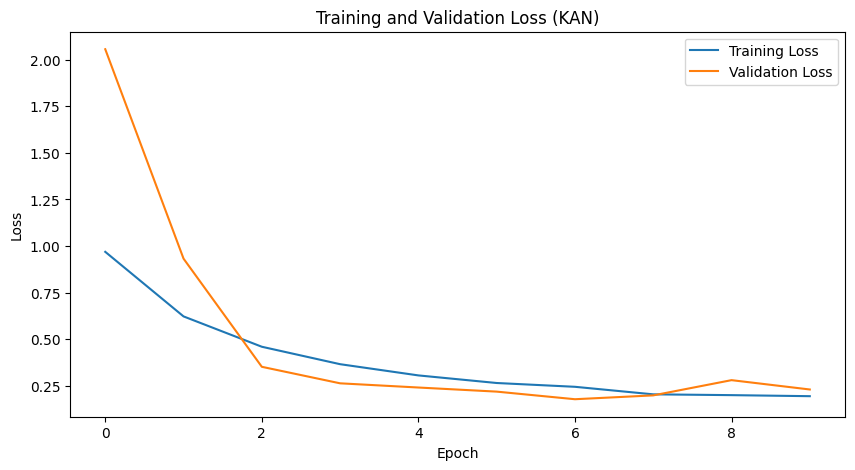

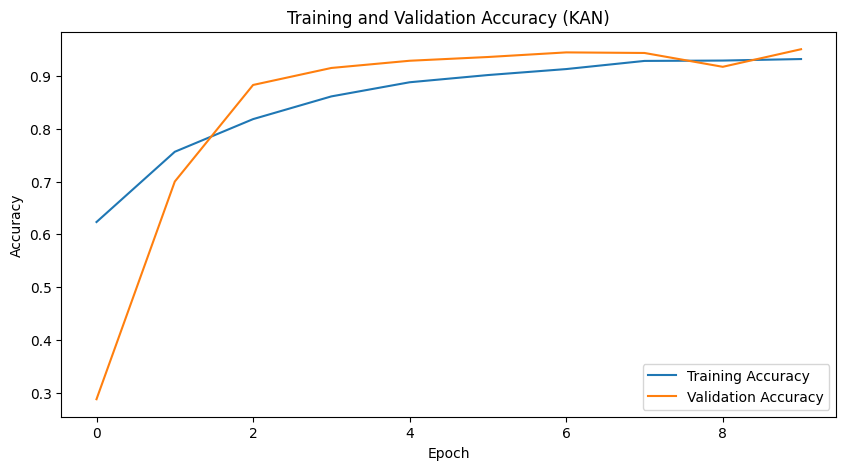

In [ ]:
modelKAN = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(64, 64, 3)),
    tf.keras.layers.Flatten(),
    DenseKAN(128),
    DenseKAN(64),
    DenseKAN(32),
    DenseKAN(16),
    DenseKAN(8),
    tf.keras.layers.Dense(4, activation='softmax')
])

model0KAN.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

historyKAN = model0KAN.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)


loss, accuracy = model0KAN.evaluate(X_test_scaled, Y_test)


plt.figure(figsize=(10, 5))
plt.plot(historyKAN.history['loss'], label='Training Loss')
plt.plot(historyKAN.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (KAN)')
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(historyKAN.history['accuracy'], label='Training Accuracy')
plt.plot(historyKAN.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (KAN)')
plt.legend()
plt.show()

In [ ]:
model0KAN.save('modelKAN.keras')

In [ ]:
import tfkan

In [ ]:
model0convKAN= tf.keras.models.Sequential(
    [
       tf.keras.layers.Input(shape=(64,64,3)),
        tfkan.layers.Conv2DKAN(16,kernel_size= (2,2)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.BatchNormalization(),
        tfkan.layers.Conv2DKAN(32,kernel_size= (2,2)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Flatten(),
        DenseKAN(32),
        tf.keras.layers.Dropout(0.3),
        DenseKAN(16),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(4,activation='softmax')
    ])


In [ ]:
model0convKAN.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

historyKAN = model0convKAN.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 28s 57ms/step - accuracy: 0.5796 - loss: 1.0751 - val_accuracy: 0.3573 - val_loss: 1.7154
Epoch 2/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.7753 - loss: 0.5727 - val_accuracy: 0.8254 - val_loss: 0.5174
Epoch 3/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.8538 - loss: 0.4047 - val_accuracy: 0.8712 - val_loss: 0.3454
Epoch 4/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.8836 - loss: 0.3228 - val_accuracy: 0.8751 - val_loss: 0.3704
Epoch 5/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.9107 - loss: 0.2710 - val_accuracy: 0.9329 - val_loss: 0.2266
Epoch 6/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.9207 - loss: 0.2427 - val_accuracy: 0.9367 - val_loss: 0.2137
Epoch 7/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.9393 - loss: 0.2030 - val_accuracy: 0.9411 - val_loss: 0.1966
Epoch 8/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.9449 - loss: 0.1739 - val

66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.8187 - loss: 1.1133
Test Loss: 1.1508042812347412, Test Accuracy: 0.8356360197067261


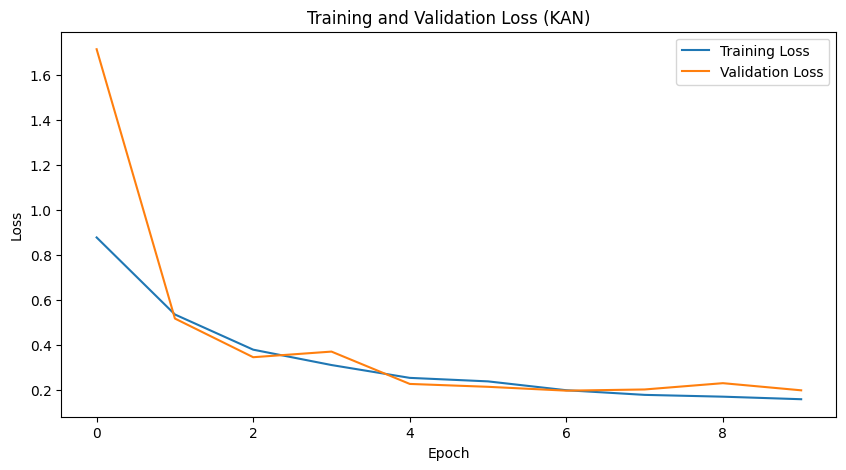

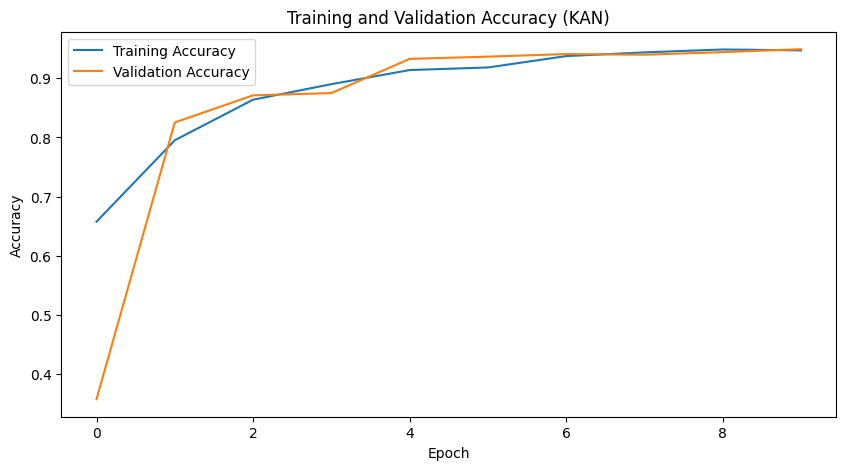

In [ ]:
loss, accuracy = model0convKAN.evaluate(X_test_scaled, Y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

plt.figure(figsize=(10, 5))
plt.plot(historyKAN.history['loss'], label='Training Loss')
plt.plot(historyKAN.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (KAN)')
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(historyKAN.history['accuracy'], label='Training Accuracy')
plt.plot(historyKAN.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (KAN)')
plt.legend()
plt.show()

In [ ]:
model0convKAN.save('modelconvKAN.keras')


**MLP-Based Model (model0):**  
- **Advantages:**  
  - Extremely lightweight (<1 MB), making it ideal for deployment in resource-constrained environments.  
  - Faster training and inference due to its simplicity and low computational complexity.  
- **Disadvantages:**  
  - Slightly lower accuracy (82.51%) compared to the fully KAN-based model.  
  - Higher test loss (1.59) indicates that it might be less effective at capturing complex feature patterns.

**Hybrid Model (model0KAN - Convolution + KAN):**  
- **Advantages:**  
  - Integrates kernel-based feature extraction in an attempt to boost performance.  
- **Disadvantages:**  
  - Underperforms significantly with an accuracy of 75.21% and a high loss (2.03).  
  - Large model size (~23.93 MB) without the performance benefits, suggesting that the integration might not be optimally leveraged.

**Fully KAN-Based Model (model0convKAN):**  
- **Advantages:**  
  - Achieves the highest accuracy (83.56%) and the lowest loss (1.15), indicating superior feature extraction and generalization capabilities.  
  - Effective at handling complex, non-linear transformations through the complete implementation of the KAN architecture.  
- **Disadvantages:**  
  - Substantially larger model size (~24.08 MB), resulting in higher memory and computational requirements, which might limit its use in resource-limited settings.

---

### **Comparison Table: Accuracy and Model Size**

| **Model**          | **Accuracy** | **Model Size**  |
|--------------------|--------------|-----------------|
| **model0**         | 82.51%       | < 1 MB          |
| **model0KAN**      | 75.21%       | ~ 23.93 MB      |
| **model0convKAN**  | 83.56%       | ~ 24.08 MB      |

---

### **Final Thoughts**

While the MLP-based model (model0) is highly efficient and compact, its performance lags slightly behind the fully KAN-based model (model0convKAN), which delivers the best accuracy and lowest loss. However, the cost of this improved performance is a significant increase in model size and computational demands. The hybrid model (model0KAN) does not offer a balanced trade-off, as it is both resource-intensive and underperforms relative to the other architectures. Thus, if accuracy and robust feature extraction are paramount—and computational resources are not a constraint—the fully KAN-based approach stands out as the best option.